In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
import sys

# Add src to path
sys.path.append('../src')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
#  Load data with proper error handling
def load_diabetes_data():
    """Load diabetes dataset with validation"""
    data_path = Path('../data/raw/Diabetes Missing Data.csv')
    
    if not data_path.exists():
        raise FileNotFoundError(f"❌ Data file not found at {data_path}")
    
    try:
        df = pd.read_csv(data_path)
        print(f"✅ Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
        return df
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

df = load_diabetes_data()

✅ Data loaded successfully: 768 rows, 9 columns


In [4]:
# Basic dataset information
def basic_data_assessment(df):
    """Perform comprehensive initial data assessment"""
    
    print("📊 DATASET BASIC INFORMATION")
    print("=" * 50)
    
    # Basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n📋 DATA TYPES AND MISSING VALUES:")
    print("=" * 40)
    info_df = pd.DataFrame({
        'dtype': df.dtypes,
        'non_null_count': df.count(),
        'null_count': df.isnull().sum(),
        'null_percentage': (df.isnull().sum() / len(df)) * 100
    })
    print(info_df)
    
    return info_df

info_df = basic_data_assessment(df)

📊 DATASET BASIC INFORMATION
Dataset shape: (768, 9)
Memory usage: 0.05 MB

📋 DATA TYPES AND MISSING VALUES:
                            dtype  non_null_count  null_count  null_percentage
Pregnancies                 int64             768           0              0.0
Glucose                     int64             768           0              0.0
BloodPressure               int64             768           0              0.0
SkinThickness               int64             768           0              0.0
Insulin                     int64             768           0              0.0
BMI                       float64             768           0              0.0
DiabetesPedigreeFunction  float64             768           0              0.0
Age                         int64             768           0              0.0
Outcome                     int64             768           0              0.0


In [5]:
# Statistical summary
def statistical_summary(df):
    """Generate detailed statistical summary"""
    
    print("📈 STATISTICAL SUMMARY")
    print("=" * 40)
    
    # Descriptive statistics
    stats = df.describe().T
    stats['median'] = df.median()
    stats['variance'] = df.var()
    stats['skewness'] = df.skew()
    stats['kurtosis'] = df.kurtosis()
    
    print(stats.round(3))
    
    return stats

stats_df = statistical_summary(df)

📈 STATISTICAL SUMMARY
                          count     mean      std     min     25%      50%  \
Pregnancies               768.0    3.845    3.370   0.000   1.000    3.000   
Glucose                   768.0  120.895   31.973   0.000  99.000  117.000   
BloodPressure             768.0   69.105   19.356   0.000  62.000   72.000   
SkinThickness             768.0   20.536   15.952   0.000   0.000   23.000   
Insulin                   768.0   79.799  115.244   0.000   0.000   30.500   
BMI                       768.0   31.993    7.884   0.000  27.300   32.000   
DiabetesPedigreeFunction  768.0    0.472    0.331   0.078   0.244    0.372   
Age                       768.0   33.241   11.760  21.000  24.000   29.000   
Outcome                   768.0    0.349    0.477   0.000   0.000    0.000   

                              75%     max   median   variance  skewness  \
Pregnancies                 6.000   17.00    3.000     11.354     0.902   
Glucose                   140.250  199.00  117.

In [6]:
#Identify biological impossibilities (zeros)
def identify_biological_impossibilities(df):
    """Identify zeros in features where zero is biologically impossible"""
    
    biological_features = [
        'Glucose', 'Diastolic_BP', 'Skin_Fold', 
        'Serum_Insulin', 'BMI'
    ]
    
    print("🔍 BIOLOGICAL IMPOSSIBILITIES ANALYSIS")
    print("=" * 50)
    
    zero_analysis = {}
    
    for feature in biological_features:
        if feature in df.columns:
            zero_count = (df[feature] == 0).sum()
            zero_percentage = (zero_count / len(df)) * 100
            zero_analysis[feature] = {
                'zero_count': zero_count,
                'zero_percentage': zero_percentage,
                'interpretation': 'BIOLOGICALLY IMPOSSIBLE' if zero_count > 0 else 'OK'
            }
            
            print(f"{feature}:")
            print(f"  - Zero values: {zero_count} ({zero_percentage:.2f}%)")
            print(f"  - Status: {zero_analysis[feature]['interpretation']}")
            print(f"  - Min value: {df[feature].min()}")
            print(f"  - Max value: {df[feature].max()}")
            print()
    
    return zero_analysis

zero_analysis = identify_biological_impossibilities(df)

🔍 BIOLOGICAL IMPOSSIBILITIES ANALYSIS
Glucose:
  - Zero values: 5 (0.65%)
  - Status: BIOLOGICALLY IMPOSSIBLE
  - Min value: 0
  - Max value: 199

BMI:
  - Zero values: 11 (1.43%)
  - Status: BIOLOGICALLY IMPOSSIBLE
  - Min value: 0.0
  - Max value: 67.1



📊 MISSING DATA VISUALIZATION


c:\USERS\HP\DESKTOP\DIABETES-DATA-PREPARATION\.VENV\Lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\USERS\HP\DESKTOP\DIABETES-DATA-PREPARATION\.VENV\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\USERS\HP\DESKTOP\DIABETES-DATA-PREPARATION\.VENV\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\USERS\HP\DESKTOP\DIABETES-DATA-PREPARATION\.VENV\Lib\site-packages\scipy\cluster\hierarchy.py:2950: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatic

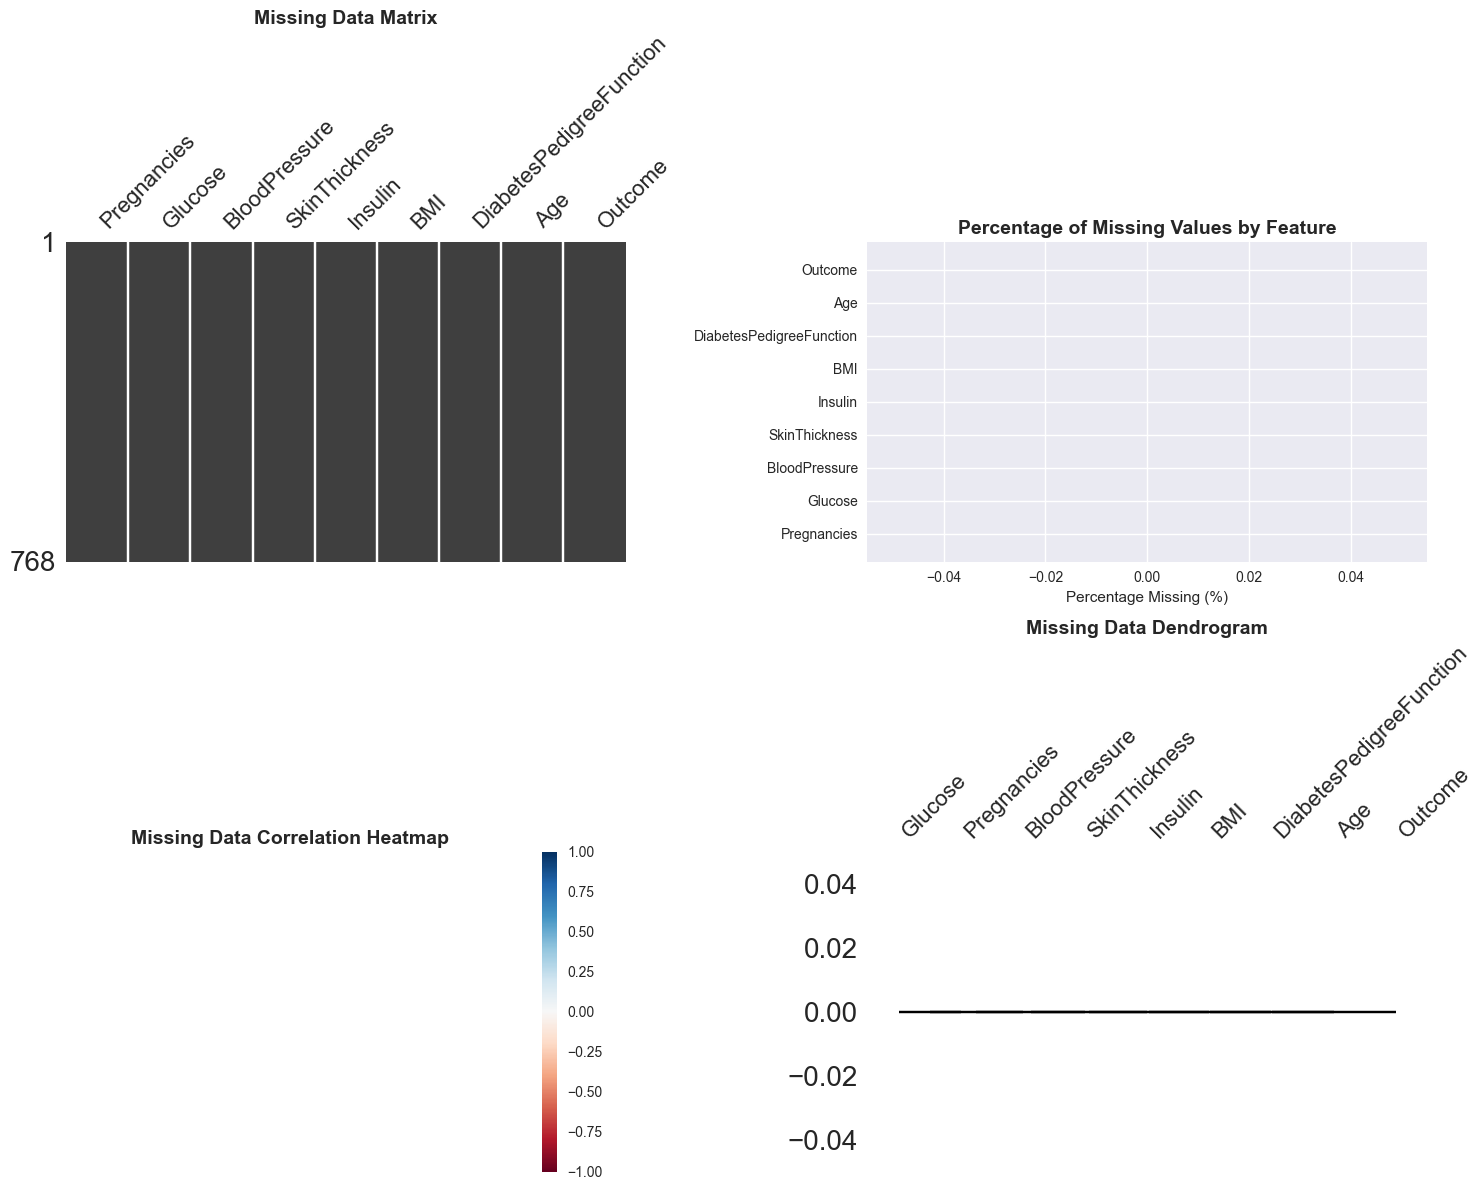

In [7]:
# Missing data visualization
def visualize_missing_data(df):
    """Create comprehensive missing data visualizations"""
    
    print("📊 MISSING DATA VISUALIZATION")
    print("=" * 40)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Missingno matrix
    msno.matrix(df, ax=axes[0,0])
    axes[0,0].set_title('Missing Data Matrix', fontsize=14, fontweight='bold')
    
    # Bar chart of missing values
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    
    axes[0,1].barh(missing_percent.index, missing_percent.values)
    axes[0,1].set_title('Percentage of Missing Values by Feature', 
                       fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Percentage Missing (%)')
    
    # Heatmap of missing data correlations
    msno.heatmap(df, ax=axes[1,0])
    axes[1,0].set_title('Missing Data Correlation Heatmap', 
                       fontsize=14, fontweight='bold')
    
    # Dendrogram of missing data patterns
    msno.dendrogram(df, ax=axes[1,1])
    axes[1,1].set_title('Missing Data Dendrogram', 
                       fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

visualize_missing_data(df)